<a href="https://colab.research.google.com/github/Chandan975/machine-learning-engineer/blob/main/AgeDAtaset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#important libraries
import pandas as pd
import numpy as np


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
age_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Engineer Content/Supervised Learning content/AgeDataset-V1.csv')

In [39]:
age_data.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [40]:
#know dataset informations
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [41]:
#about know this data set
print(age_data.shape) #check dataset shape
print(age_data.size) #check dataset size
print(age_data.ndim) #check dataset dimensions
print(age_data.dtypes) #check dataset datatypes

(1223009, 10)
12230090
2
Id                    object
Name                  object
Short description     object
Gender                object
Country               object
Occupation            object
Birth year             int64
Death year           float64
Manner of death       object
Age of death         float64
dtype: object


In [42]:
#____________check null values______________
age_data.isnull().sum().sort_values(ascending = False)

Manner of death      1169406
Country               335509
Occupation            206914
Gender                133646
Short description      67900
Death year                 1
Age of death               1
Id                         0
Name                       0
Birth year                 0
dtype: int64

In [43]:
for i in age_data:
  print(i)

Id
Name
Short description
Gender
Country
Occupation
Birth year
Death year
Manner of death
Age of death


In [44]:
#_____________________change columns name ___________________________

age_data= age_data.rename({'Short description':'dscription','Birth year':'b_year','Death year':'d_year','Manner of death':'manner_d','Age of death':'age_d'}, axis='columns')

In [45]:
age_data.head()

,Id,Name,dscription,Gender,Country,Occupation,b_year,d_year,manner_d,age_d
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [79]:
#_____________________one column counts values __________
top_causes = age_data.groupby('manner_d').size().reset_index(name = 'count')
top_causes = top_causes.sort_values(by = 'count', ascending = False).iloc[:10]
print(top_causes)

                                manner_d  count
137                       natural causes  33532
167                              suicide   5814
25                              accident   5044
95                              homicide   4692
46                    capital punishment   3415
198                      unnatural death    308
74                       death in battle    250
60   capital punishment; unnatural death     79
54          capital punishment; homicide     42
56           capital punishment; suicide     42


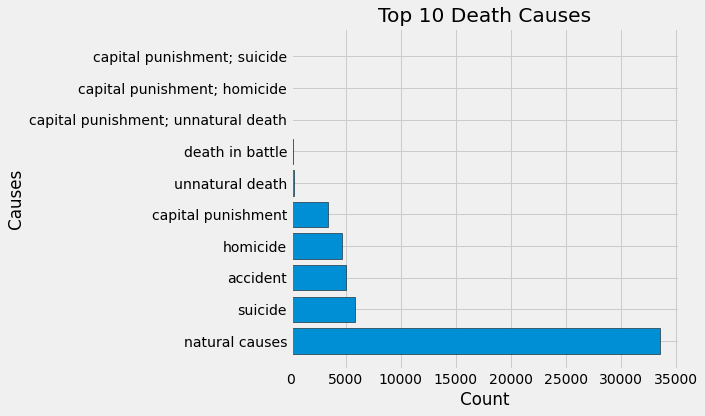

In [84]:
#show top 10 causes this graph
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,6))
plt.barh(top_causes['manner_d'], top_causes['count'], edgecolor = 'black')
plt.title('Top 10 Death Causes')
plt.xlabel('Count')
plt.ylabel('Causes')
plt.tight_layout()
plt.style.use('Solarize_Light2')

In [88]:
# Top 20 birth years:
birth_year = age_data.groupby('b_year').size().reset_index(name = 'count')
birth_year = birth_year.sort_values(by = 'count', ascending = False).iloc[:25]
print(birth_year)

      b_year  count
2078    1920  13468
2079    1921  13373
2080    1922  12856
2082    1924  12856
2081    1923  12691
2083    1925  12495
2084    1926  11899
2085    1927  11699
2086    1928  11604
2072    1914  11591
2070    1912  11403
2071    1913  11364
2068    1910  11221
2087    1929  11125
2088    1930  11073
2077    1919  10997
2069    1911  10882
2067    1909  10870
2066    1908  10862
2065    1907  10715
2073    1915  10566
2064    1906  10502
2076    1918  10453
2063    1905  10328
2062    1904  10272


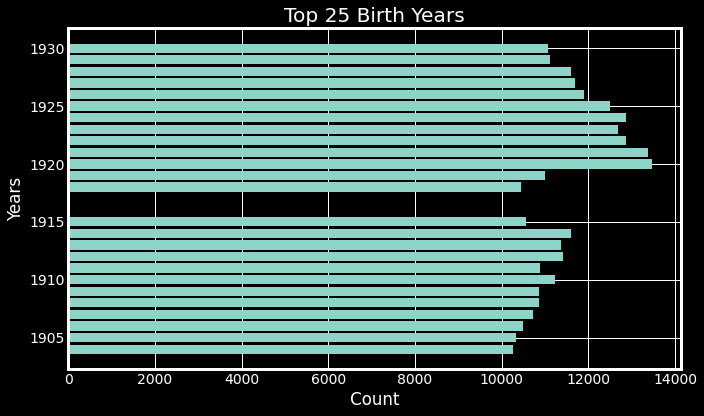

In [89]:
fig = plt.figure(figsize = (10,6))
plt.barh(birth_year['b_year'], birth_year['count'])
plt.title('Top 25 Birth Years')
plt.xlabel('Count')
plt.ylabel('Years')
plt.tight_layout()
plt.style.use('dark_background')

Text(0.5, 1.0, 'Top 10 Genders')

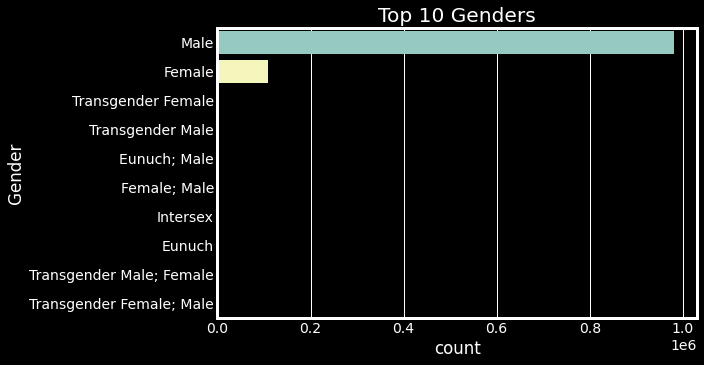

In [91]:
import seaborn as sns
gd = age_data.groupby('Gender').size().reset_index(name = 'count').sort_values(by = 'count', ascending = False).iloc[:10]
gd = pd.DataFrame(gd)
fig = plt.figure(figsize = (10,5))
sns.barplot(y = gd['Gender'], x = gd['count'], data= gd)
plt.tight_layout()
plt.title('Top 10 Genders')